In [1]:
#Instalo e importo paquetes 

!pip install pandas
import pandas as pd 

import numpy as np 
import os

from IPython.display import Image, display, HTML

import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
html_texto = """
<h3 style="color: navy;">Parte I: Creación de variables, histogramas, kernels y resumen de la base de datos final</h3>
<p> 
La idea de esta primera parte es que completen la limpieza de la base de datos que contiene las observaciones del primer trimestre de 2005 y del 
primer trimestre de 2025. La base final a trabajar resultante debe incluir todas las variables presentes en ambos trimestres, expresadas de manera 
homogénea. Es decir, si la variable CH04 en 2005 toma los valores “Hombre” o “Mujer”, y en 2025 toma los valores 1 y 2, la variable limpia 
en la base final debe tener solamente dos valores consistentes. 
</p>
"""
display(HTML(html_texto))


In [3]:
############# INDIVIDUOS  ##############

#SUBO EL SET DE DATOS INDIVISUALES DEL PRIMER TRIMESTRE DE 2025
t0125 = pd.read_excel('usu_individual_T125.xlsx')

#SUBO EL SET DE DATOS INDIVISUALES DEL PRIMER TRIMESTRE DE 2005
t0105 = pd.read_stata('Individual_t105.dta')

############# HOGARES  ##############

#SUBO EL SET DE DATOS HOGARES DEL PRIMER TRIMESTRE DE 2025
th0125 = pd.read_excel('usu_hogar_T125.xlsx')
#th0125

#SUBO EL SET DE DATOS HOGARES DEL PRIMER TRIMESTRE DE 2005
th0105 = pd.read_stata('Hogar_t105.dta')



In [4]:
#CREO UNA FUNCION QUE ME TRANSFORME EL TIPO DE DATO DE LA COLUMNA EN CUESTION.
#LE DEBO CARGAR EL NOMBRE DEL DATAFRAME, EL NOMBRE DE LA COLUMNA Y EL MAPEO DE DATOS QUE DEBE TRANSFORMAR

def mapear_columna(df, columna, diccionario):
    
    #Creo esta lista para ir depositando los errores que vaya encontrado la transformacion y después ver qué corregir 
    errores = []

    # Asegura que la columna esté en formato string para comparar
    df[columna] = df[columna].astype(str)

    #Armo un bucle para que recorra todas las celdas de la columna y vaya tranformando los datos segun el diccionario.
    #Para ello utilizo la función .at[] con la que modifico una sola celda en un DataFrame, usando la combinación de índice y nombre de columna.
    
    for i in df.index:
        valor = df.at[i, columna]
        if valor in diccionario:
            df.at[i, columna] = diccionario[valor]
        else:
            errores.append((i, valor))

    # Convierte la columna al tipo int64 si todo salió bien
    try:
        df[columna] = df[columna].astype('int64')
    except ValueError:
        pass  # Si hay errores, no se puede convertir

    return df, errores

In [5]:
############# EMPIEZO A HOMOGENEIZAR LOS DATOS  ##############

#region 2005
mapa = {    'Gran Buenos Aires': 1,    'NOA':40,    'NEA':41,    'Cuyo':42,    'Pampeana':43,    'Patagónica':44 }
t0105, errores = mapear_columna(t0105, 'region', mapa)


#aglomerado 2005
mapa = {'Gran La Plata': 2, 'Bahía Blanca - Cerri': 3,'Gran Rosario': 4,'Gran Santa Fe': 5,'Gran Paraná': 6,'Posadas': 7,
        'Gran Resistencia': 8, 'Gran Mendoza': 10,'Corrientes': 12,'Gran Córdoba': 13,'Concordia': 14,'Formosa': 15,
        'Cdro. Rivadavia – Rada Tilly': 9, 'Comodoro Rivadavia - Rada Tilly':9,
        'Neuquén – Plottier': 17,'Neuquén - Plottier':17,
        'S.del Estero - La Banda': 18,'Santiago del Estero - La Banda':18,
        'Jujuy - Palpalá': 19,'Río Gallegos': 20,'Gran Catamarca': 22,'Salta': 23,'La Rioja': 25,
        'San Luis - El Chorrillo': 26,'Gran San Juan': 27,'Gran Tucumán - T. Viejo': 29, 'Gran Tucumán - Tafí Viejo':29,
        'Santa Rosa - Toay': 30, 'Ushuaia - Río Grande': 31,'Ciudad de Buenos Aires': 32,'Partidos del GBA': 33,
        'Mar del Plata - Batán': 34,'Río Cuarto': 36
}
t0105, errores = mapear_columna(t0105, 'aglomerado', mapa)

In [6]:
#ch3 2005
mapa = {       'Jefe/a': 1,     'Jefe': 1,     'Cónyuge/pareja': 2,    'Cónyuge/Pareja': 2,    'Hijo/a/hijastro/a': 3,  'Hijo/Hijastro': 3,
         'Yerno/nuera': 4,   'Yerno/Nuera': 4,    'Nieto/a': 5,            'Nieto': 5,         'Madre/padre': 6,         'Madre/Padre': 6,
         'Suegro/a': 7,             'Suegro': 7, 'Hermano/a': 8,          'Hermano': 8,
    'Otros familiares': 9,    'No familiares': 10
}
t0105, errores = mapear_columna(t0105, 'ch03', mapa)

#ch04 2005 lo llevo a numerico dummies.. En 2025, retransformo como dummie llevando a mujer a 0 en lugar de 2
mapa = {    'Varón': 1,    'Mujer': 0  }
t0105, errores = mapear_columna(t0105, 'ch04', mapa)

t0125['CH04'] = np.where(t0125['CH04']  ==  1,1,0)

######################################################################
#Para el 2005 - Llevo de 1 a 97 años para homogeneizar xq en 2005 a ese sector lo trataban con un texto
t0105['ch06'] = t0105['ch06'].astype(str)

t0105 = t0105.loc[
    (t0105['ch06'] != 'Menos de 1 año') & 
    (t0105['ch06'] != '98 y más años')
]

t0105['ch06'] = pd.to_numeric(t0105['ch06'], errors='coerce')

#############

#Para el 2025
t0125['CH06'] = t0125['CH06'].astype(str)

t0125 = t0125.loc[
    (t0125['CH06'] != 'Menos de 1 año') & 
    (t0125['CH06'] != '98 y más años') &
    (t0125['CH06'] != '98') & (t0125['CH06'] != '99') & (t0125['CH06'] != '100') & (t0125['CH06'] != '101') & 
    (t0125['CH06'] != '102') & (t0125['CH06'] != '103') & 
    (t0125['CH06'] != '-1') 
]

#una vez recodificado transformo el tipo de dato
t0125['CH06'] = pd.to_numeric(t0125['CH06'], errors='coerce')


In [7]:
#####################################################
#CH07 - 

mapa = {    'Unido':1, 'Casado':2, 'Separado o divorciado':3, 'Viudo':4, 'Soltero':5  }
t0105, errores = mapear_columna(t0105, 'ch07', mapa)

#En 2005 habia una opcion Ns/Nr que no tiene tipificacion en 2025 así que lo haré Null
t0105['ch07'] = t0105['ch07'].replace('Ns/Nr', np.nan)

#####################################################
#CH08
# Hay items escritos de maneras diferentes, pero como los diccionarios nos permites repetir valores pero No Keys, 
# repetimos el código tipificado con su key diferente

mapa = {
'Obra social (incluye PAMI)':1, 'Mutual/Prepaga/Servicio de emergencia':2, 'Planes y seguros públicos':3, 'No paga ni le descuentan':4, 'Ns./Nr.':9, 
'Obra social y mutual/prepaga/servicio de emergencia':12, 'Obra social y planes y seguros públicos':13, 
'Mutual /prepaga / servicio de emergencia / Planes y Seguros Públicos':23, 
'Mutual/prepaga/servicio de emergencia/planes y seguros públi':23,
'Obra social, mutual/prepaga/servicio de emergencia y planes':123, 
'Obra social, mutual / prepaga / servicio de emergencia y Planes y Seguros Públicos':123
}

t0105, errores = mapear_columna(t0105, 'ch08', mapa)
#####################################################

#Para ch12
# Se tomara como null los codigos no tipificados como el 0 o 99, el Ns/Nc, y el 0.0 que aparecen entre los registros.

mapa = {'Jardín/Preescolar' : 1,	'Jardín/preescolar' : 1, 'Primario' : 2, 'EGB' : 3, 'Secundario' : 4, 'Polimodal' : 5, 
        'Terciario' : 6, 'Universitario' : 7, 'Posgrado universitario' : 8, 'Posgrado Universitario' : 8, 
            'Educación especial (discapacidad)' : 9,  'Educación especial (discapacitado)':9
           }

t0105, errores = mapear_columna(t0105, 'ch12', mapa)

#
t0105['ch07'] = t0105['ch07'].replace(0, np.nan)
t0105['ch07'] = t0105['ch07'].replace('0.0', np.nan)
t0105['ch07'] = t0105['ch07'].replace(99, np.nan)
t0105['ch07'] = t0105['ch07'].replace('Ns/Nr', np.nan)


##############################################################################################################################
#Para ch13
# acá existe tupificacion, recategorizo valores como 0 o 0.0 a "no sabe/ no contesta"
mapa = {'Sí': 1, 'No':2, 
        'Ns/Nr':9, 'Ns./Nr.':9, '0':9, '0.0':9        }
t0105, errores = mapear_columna(t0105, 'ch13', mapa)



##############################################################################################################################
#CH14

#Primero lo llevo a string para despues llevarlo a numerico al campo del ultimo curso aprobado

t0105['ch14'] = t0105['ch14'].astype(str).str.strip()
t0105['ch14'] = pd.to_numeric(t0105['ch14'], errors='coerce')

#reemplaza los valores nulos por el 0, que si esta tipificado aqui
t0105['ch14'] = t0105['ch14'].fillna(0)

In [8]:

#nivel_ed


#Para el Nivel educativo

mapa = {'Primaria Completa':2, 'Primaria Incompleta (incluye educación especial)':1, 'Secundaria Completa':4, 
            'Secundaria Incompleta':3, 'Sin instrucción':7, 'Superior Universitaria Completa':6, 
            'Superior Universitaria Incompleta':5, 'Ns/Nr':9
           }

t0105, errores = mapear_columna(t0105, 'nivel_ed', mapa)

#############################################################

#estado

mapa = {'Entrevista individual no realizada (no respuesta al cuestion':0, 
                'Ocupado':1, 'Desocupado':2, 'Inactivo':3, 'Menor de 10 años':4
               }

t0105, errores = mapear_columna(t0105, 'estado', mapa)

#############################################################

#Para cat_ocup - la categoria ocupacional

mapa = {'Patrón':1, 'Cuenta propia':2, 'Obrero o empleado':3,
              'Trabajador familiar sin remuneración':4,'Nr/Nr':9
             }
t0105, errores = mapear_columna(t0105, 'cat_ocup', mapa)

t0105['cat_ocup'] = pd.to_numeric(t0105['cat_ocup'], errors='coerce')

#############################################################

#CAT_INAC

cat_inac_map = {'Ama de casa':4, 'Discapacitado':6, 'Estudiante':3, 'Jubilado/pensionado':1, 
                'Menor de 6 años':5, 'Otros':7, 'Rentista':2
               }
t0105, errores = mapear_columna(t0105, 'cat_inac', cat_inac_map)

t0105['cat_inac'] = pd.to_numeric(t0105['cat_inac'], errors='coerce')

#############################################################
# Se termina de limpiar datos de ambas bases. 

#Como el valor "0" no esta tipificado dentro de los cuadros de referencia, lo reemplazare por un valor nulo

t0105['cat_inac'] = t0105['cat_inac'].replace(0, np.nan)
t0125['CAT_INAC'] = t0125['CAT_INAC'].replace(0, np.nan)

t0105['cat_ocup'] = t0105['cat_ocup'].replace(0, np.nan)
t0125['CAT_OCUP'] = t0125['CAT_OCUP'].replace(0, np.nan)

#Ahora, a los Nulos de  CAT_OCUP los convierto en el codigo de Ns/Nc que si esta tipificado
t0105['cat_ocup'] = t0105['cat_ocup'].fillna(9)



In [9]:

#PP04B_COD


t0105['pp04b_cod'] = pd.to_numeric(t0105['pp04b_cod'], errors='coerce')
t0105['pp04b_cod'] = t0105['pp04b_cod'].replace(0, np.nan)

#Porque sino despues no voy a poder concatenar los 2 Dataframes 
t0125['PP04B_COD'] = pd.to_numeric(t0125['PP04B_COD'], errors='coerce')

##############################################################################################################################

#TRANSFORMO LOS DATOS EN 0´s EN NULLs Y A LOS 999 EN 0

t0125['PP3E_TOT'] = np.where(t0125['PP3E_TOT']  ==  999,np.nan,t0125['PP3E_TOT'])
t0105['pp3e_tot'] = np.where(t0105['pp3e_tot']  ==  999,np.nan,t0105['pp3e_tot'])


t0125['PP3F_TOT'] = np.where(t0125['PP3F_TOT']  ==  999,np.nan,t0125['PP3F_TOT'])
t0105['pp3f_tot'] = np.where(t0105['pp3f_tot']  ==  999,np.nan,t0105['pp3f_tot'])


t0105['pp3e_tot'] = t0105['pp3e_tot'].replace(0, np.nan)
t0125['PP3E_TOT'] = t0125['PP3E_TOT'].replace(0, np.nan)

##############################################################################################################################

#AGREGO UNA COLUMNA EN CADA TRIMESTRE PARA INDICAR EL AÑO

t0105['ANIO'] = np.int64(2005)
t0125['ANIO'] = np.int64(2025)


In [10]:

#AHORA VOY ESTABLECER LAS COLUMNAS CON LAS QUE ME VOY A QUEDAR, EN LAS 2 TABLAS

t0105_sel_c = t0105[[
'CODUSU', 'nro_hogar', 'region', 'aglomerado', 'pondera', 'ch03', 'ch04', 'ch06', 'ch07', 'ch08', 'ch12', 'ch13', 'ch14', 
    'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp3e_tot', 'pp3f_tot', 'pp04b_cod', 'itf', 'ipcf', 'ANIO'
]].copy()

t0125_sel_c = t0125[[
'CODUSU', 'NRO_HOGAR', 'REGION', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH12', 'CH13', 'CH14', 
    'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP3E_TOT', 'PP3F_TOT', 'PP04B_COD', 'ITF', 'IPCF', 'ANIO'
]].copy()



In [11]:
#Tengo que renombrar las columnas para que ambos dataframes tengan igual nombre porque sino 
#no voy a poder poder concatenar correctamente (en la misma columna, una abajo de la otra)los 2 DataFrames

t0105_sel_c = t0105_sel_c.rename(columns={
'nro_hogar': 'NRO_HOGAR',
'region':'REGION',
'aglomerado': 'AGLOMERADO',
'pondera': 'PONDERA',
'ch03': 'CH03',
'ch04': 'CH04',
'ch06': 'CH06',
'ch07': 'CH07',
'ch08': 'CH08',
'ch12': 'CH12', 
'ch13': 'CH13', 
'ch14': 'CH14',
'nivel_ed': 'NIVEL_ED',
'estado': 'ESTADO',
'cat_ocup': 'CAT_OCUP',
'cat_inac': 'CAT_INAC',
'pp3e_tot': 'PP3E_TOT', 
'pp3f_tot': 'PP3F_TOT',
'pp04b_cod': 'PP04B_COD',
'itf':'ITF',
'ipcf': 'IPCF'
})




In [12]:

#Ahora uno a las 2 bases de datos individuales del 2.a

sel_indiv_c = pd.concat([t0125_sel_c, t0105_sel_c], axis=0, ignore_index=True)
#sel_indiv= sel_t0125.append(sel_t0105)

sel_indiv_c


,CODUSU,NRO_HOGAR,REGION,AGLOMERADO,PONDERA,CH03,CH04,CH06,CH07,CH08,...,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,PP3E_TOT,PP3F_TOT,PP04B_COD,ITF,IPCF,ANIO
0,TQRMNOVQVHJOLOCDEFKID00875778,1.0,43,4,927.0,2,0,25.0,1,4.0,...,4,1,3.0,NaN,24.0,0.0,4808.0,1028000.0,205600.0,2025
1,TQRMNOVQVHJOLOCDEFKID00875778,1.0,43,4,927.0,3,0,7.0,5,4.0,...,1,4,NaN,3.0,NaN,NaN,NaN,1028000.0,205600.0,2025
2,TQRMNOVQVHJOLOCDEFKID00875778,1.0,43,4,927.0,3,1,4.0,5,4.0,...,7,4,NaN,5.0,NaN,NaN,NaN,1028000.0,205600.0,2025
3,TQRMNOUPQHLOLOCDEFKID00851757,1.0,43,4,1294.0,1,0,29.0,5,4.0,...,5,1,2.0,NaN,70.0,0.0,4808.0,690000.0,230000.0,2025
4,TQRMNOUPQHLOLOCDEFKID00851757,1.0,43,4,1294.0,3,0,13.0,5,4.0,...,1,3,NaN,3.0,NaN,NaN,NaN,690000.0,230000.0,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91426,288015,1.0,44,31,129.0,3,0,16.0,5,1.0,...,3,3,9.0,3.0,NaN,0.0,NaN,3800.0,950.0,2005
91427,288015,1.0,44,31,129.0,3,1,12.0,5,1.0,...,2,3,9.0,3.0,NaN,0.0,NaN,3800.0,950.0,2005
91428,288294,1.0,44,31,107.0,1,1,43.0,1,1.0,...,3,1,3.0,NaN,63.0,0.0,5307.0,4068.0,1356.0,2005
91429,288294,1.0,44,31,107.0,2,0,26.0,1,1.0,...,4,1,3.0,NaN,69.0,0.0,5307.0,4068.0,1356.0,2005


In [13]:
# AHORA UNON DE HOGARES


In [15]:
# documento de HOGARES
#Para TIPO DE VIVIENDA

#Defino el diccionario de valores que debe buscar y reemplazar
iv1_map = {
    'Casa': 1,     'Departamento': 2,
    'Pieza  de inquilinato': 3,    'Pieza  de hotel/Pensión': 4,
    'Local no construido para habitacion': 5,  'Otros': 6
}

th0105, errores = mapear_columna(th0105, 'iv1', iv1_map)

#una vez recodificado transformo el tipo de dato a numerico
th0105['iv1'] = pd.to_numeric(th0105['iv1'], errors='coerce')

####################################################################################################
#Para EN CUANTOS AMBIENTES VIVE

#Aqui solo transformo el tipo de dato a numerico. La opcion errors='coerce' deja el dato como NA´s.
th0105['iv2'] = pd.to_numeric(th0105['iv2'], errors='coerce')

####################################################################################################


#Para TIENE AGUA

#Defino el diccionario de valores que debe buscar y reemplazar
iv6_map = {
    'Por cañeria dentro de la vivienda': 1,     'Fuera de la vivienda pero dentro del terreno': 2,    'Fuera del terreno': 3
            }
#Para meter los errores en una lista que vaya encontrado la transformacion y después que pueda imprimir y ver de corregirlos

th0105, errores = mapear_columna(th0105, 'iv6', iv6_map)

#una vez recodificado transformo el tipo de dato a numerico
th0105['iv6'] = pd.to_numeric(th0105['iv6'], errors='coerce')
####################################################################################################

# tomare a la variable de TIENE LETRINA con una Dummies, recodificandola en 0 y 1.

th0105['iv8'] = np.where(th0105['iv8']  ==  'Sí', 1, 0)
th0105['iv8'] = np.where(th0105['iv8']  ==  'Sí', 1, 0)


#una vez recodificado transformo el tipo de dato
th0105['iv8'] = th0105['iv8'].astype('int64')

th0105['iv8'] = th0105['iv8'].replace(0, np.nan)
th0125['IV8'] = th0125['IV8'].replace(0, np.nan)

####################################################################################################

#Para COMBUSTIBLE PARA COCINAR

#Defino el diccionario de valores que debe buscar y reemplazar
ii8_map = {
    'Gas de red': 1,     'Gas de tubo/garrafa': 2,    'Kerosene/leña/carbon': 3,    'Otro': 4
            }

th0105, errores = mapear_columna(th0105, 'ii8', ii8_map)

#una vez recodificado transformo el tipo de dato a numerico
th0105['ii8'] = pd.to_numeric(th0105['ii8'], errors='coerce')


th0105['ii8'] = th0105['ii8'].replace(0, np.nan)
th0125['II8'] = th0125['II8'].replace(0, np.nan)


#th0105

In [16]:
#Selecciono  las filas y columnas con la que trabajaré de cada trimestre

th0105_sel_c = th0105[['CODUSU', 'nro_hogar', 'iv1', 'iv2', 'iv6', 'iv8', 'ii8']].copy()
#sel_th0105

th0125_sel_c = th0125[['CODUSU','NRO_HOGAR','IV1', 'IV2', 'IV6', 'IV8', 'II8']].copy()
#sel_th0125

#VOY ANALIZANDO LOS TIPOS DE DATOS DE AMBOS DATAFRAMES. PARA ESTABLECER LAS COLUMNAS QUE REQUIEREN RECONVERSION

print(th0105_sel_c.dtypes)
print(th0125_sel_c.dtypes)

CODUSU        object
nro_hogar    float64
iv1          float64
iv2          float64
iv6          float64
iv8          float64
ii8          float64
dtype: object
CODUSU        object
NRO_HOGAR      int64
IV1            int64
IV2            int64
IV6            int64
IV8            int64
II8          float64
dtype: object


In [17]:
th0105_sel_c = th0105_sel_c.rename(columns={
'nro_hogar': 'NRO_HOGAR',
'iv1': 'IV1',
'iv2': 'IV2',
'iv6': 'IV6',
'iv8': 'IV8',
'ii8': 'II8'
})


In [19]:
#Ahora uno a las 2 bases de datos individuales del 2.a

sel_hogar_c = pd.concat([th0125_sel_c, th0105_sel_c], axis=0, ignore_index=True)
#sel_indiv= sel_t0125.append(sel_t0105)

sel_hogar_c

,CODUSU,NRO_HOGAR,IV1,IV2,IV6,IV8,II8
0,TQRMNOQVSHKOLNCDEGGFB00858441,1.0,1.0,4.0,1.0,1.0,2.0
1,TQSMNORTSHMOLTCDEGGFB00877605,1.0,1.0,3.0,1.0,1.0,1.0
2,TQRMNOQQXHMMMLCDEGGFB00877606,1.0,1.0,2.0,1.0,1.0,1.0
3,TQRMNOTTWHMMLOCDEFIAH00877819,1.0,1.0,2.0,1.0,1.0,1.0
4,TQRMNORQQHLMKOCDEHIBB00853810,2.0,1.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...
29576,285584,1.0,1.0,6.0,NaN,NaN,1.0
29577,285787,1.0,1.0,1.0,NaN,NaN,1.0
29578,288074,1.0,1.0,4.0,NaN,NaN,1.0
29579,288189,1.0,1.0,4.0,NaN,NaN,2.0


In [ ]:
#NO VA - Solo para revisar las transformaciones en excel

##############################################################

#destino
carpeta2 = r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP3-Grupo3\outputs'

#2005
# Asi se llamara el excel
archivo_nombre = "sel_hogar_c.xlsx"

destino = os.path.join(carpeta2, archivo_nombre)

# Guardo el archivo
sel_hogar_c.to_excel(destino, index=False)
########################################

#IV8 2005 NO TIENE DATOS, SON SOLO 0s.



In [25]:
# Ahora se va a cruzar los dataframes de individuos y hogares
union_eph_1 = pd.merge(sel_indiv_c,sel_hogar_c, on=('CODUSU','NRO_HOGAR'), how='left')

union_eph_1[['CODUSU','NRO_HOGAR','IV1', 'IV2', 'IV6', 'IV8', 'II8',
           'CODUSU', 'NRO_HOGAR', 'REGION', 'AGLOMERADO', 'PONDERA', 
           'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH12', 'CH13', 'CH14', 
           'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP3E_TOT', 'PP3F_TOT', 'PP04B_COD', 
           'ITF', 'IPCF']]

,CODUSU,NRO_HOGAR,IV1,IV2,IV6,IV8,II8,CODUSU,NRO_HOGAR,REGION,...,CH14,NIVEL_ED,ESTADO,CAT_OCUP,CAT_INAC,PP3E_TOT,PP3F_TOT,PP04B_COD,ITF,IPCF
0,TQRMNOVQVHJOLOCDEFKID00875778,1.0,1.0,3.0,1.0,1.0,2.0,TQRMNOVQVHJOLOCDEFKID00875778,1.0,43,...,NaN,4,1,3.0,NaN,24.0,0.0,4808.0,1028000.0,205600.0
1,TQRMNOVQVHJOLOCDEFKID00875778,1.0,1.0,3.0,1.0,1.0,2.0,TQRMNOVQVHJOLOCDEFKID00875778,1.0,43,...,1.0,1,4,NaN,3.0,NaN,NaN,NaN,1028000.0,205600.0
2,TQRMNOVQVHJOLOCDEFKID00875778,1.0,1.0,3.0,1.0,1.0,2.0,TQRMNOVQVHJOLOCDEFKID00875778,1.0,43,...,0.0,7,4,NaN,5.0,NaN,NaN,NaN,1028000.0,205600.0
3,TQRMNOUPQHLOLOCDEFKID00851757,1.0,2.0,3.0,1.0,1.0,2.0,TQRMNOUPQHLOLOCDEFKID00851757,1.0,43,...,3.0,5,1,2.0,NaN,70.0,0.0,4808.0,690000.0,230000.0
4,TQRMNOUPQHLOLOCDEFKID00851757,1.0,2.0,3.0,1.0,1.0,2.0,TQRMNOUPQHLOLOCDEFKID00851757,1.0,43,...,5.0,1,3,NaN,3.0,NaN,NaN,NaN,690000.0,230000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91426,288015,1.0,1.0,5.0,NaN,NaN,1.0,288015,1.0,44,...,2.0,3,3,9.0,3.0,NaN,0.0,NaN,3800.0,950.0
91427,288015,1.0,1.0,5.0,NaN,NaN,1.0,288015,1.0,44,...,7.0,2,3,9.0,3.0,NaN,0.0,NaN,3800.0,950.0
91428,288294,1.0,1.0,4.0,NaN,NaN,1.0,288294,1.0,44,...,2.0,3,1,3.0,NaN,63.0,0.0,5307.0,4068.0,1356.0
91429,288294,1.0,1.0,4.0,NaN,NaN,1.0,288294,1.0,44,...,0.0,4,1,3.0,NaN,69.0,0.0,5307.0,4068.0,1356.0


In [42]:
# SUBO LISTADO DE POBREZA REALIZADO EN EL TP2
eph_n_pobreza = pd.read_excel('eph_n_pobreza_x_hog.xlsx')

eph_n_pobreza_1= eph_n_pobreza[['CODUSU','NRO_HOGAR','CH03','CH04','CH06','CH07','CH08','NIVEL_ED','pobre']].copy()

In [43]:
union_eph = pd.merge(union_eph_1,eph_n_pobreza_1, on=('CODUSU','NRO_HOGAR','CH03','CH04','CH06','CH07','CH08','NIVEL_ED'), how='left')
union_eph

,CODUSU,NRO_HOGAR,REGION,AGLOMERADO,PONDERA,CH03,CH04,CH06,CH07,CH08,...,PP04B_COD,ITF,IPCF,ANIO,IV1,IV2,IV6,IV8,II8,pobre
0,TQRMNOVQVHJOLOCDEFKID00875778,1.0,43,4,927.0,2,0,25.0,1,4.0,...,4808.0,1028000.0,205600.0,2025,1.0,3.0,1.0,1.0,2.0,NaN
1,TQRMNOVQVHJOLOCDEFKID00875778,1.0,43,4,927.0,3,0,7.0,5,4.0,...,NaN,1028000.0,205600.0,2025,1.0,3.0,1.0,1.0,2.0,NaN
2,TQRMNOVQVHJOLOCDEFKID00875778,1.0,43,4,927.0,3,1,4.0,5,4.0,...,NaN,1028000.0,205600.0,2025,1.0,3.0,1.0,1.0,2.0,NaN
3,TQRMNOUPQHLOLOCDEFKID00851757,1.0,43,4,1294.0,1,0,29.0,5,4.0,...,4808.0,690000.0,230000.0,2025,2.0,3.0,1.0,1.0,2.0,NaN
4,TQRMNOUPQHLOLOCDEFKID00851757,1.0,43,4,1294.0,3,0,13.0,5,4.0,...,NaN,690000.0,230000.0,2025,2.0,3.0,1.0,1.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91560,288015,1.0,44,31,129.0,3,0,16.0,5,1.0,...,NaN,3800.0,950.0,2005,1.0,5.0,NaN,NaN,1.0,NaN
91561,288015,1.0,44,31,129.0,3,1,12.0,5,1.0,...,NaN,3800.0,950.0,2005,1.0,5.0,NaN,NaN,1.0,NaN
91562,288294,1.0,44,31,107.0,1,1,43.0,1,1.0,...,5307.0,4068.0,1356.0,2005,1.0,4.0,NaN,NaN,1.0,NaN
91563,288294,1.0,44,31,107.0,2,0,26.0,1,1.0,...,5307.0,4068.0,1356.0,2005,1.0,4.0,NaN,NaN,1.0,NaN


In [45]:

a=union_eph_1.duplicated(subset=['CODUSU','NRO_HOGAR','CH03','CH04','CH06','CH07','CH08','NIVEL_ED']).sum()
print(a)
b=eph_n_pobreza_1.duplicated(subset=['CODUSU','NRO_HOGAR','CH03','CH04','CH06','CH07','CH08','NIVEL_ED']).sum()
print(b)

293
66


In [47]:
##############################################################

#destino
carpeta2 = r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP3-Grupo3\outputs'

#2005
# Asi se llamara el excel
archivo_nombre = "union_eph.xlsx"

destino = os.path.join(carpeta2, archivo_nombre)

# Guardo el archivo
union_eph.to_excel(destino, index=False)

In [46]:
html_texto = """
<h3 style="color: navy;">Parte I.1</h3>
<p> 
Cree la variable “edad2” definida como edad2 (edad al cuadrado). Presente un histograma de la variable edad en un panel A, 
y a la par una distribución de kernels para los pobres y no pobres en un panel B (esto es, son dos líneas de kernel en este segundo panel). 
Comente brevemente la distribución de edades en estos dos paneles (3-4 oraciones). '
</p>
"""

display(HTML(html_texto))


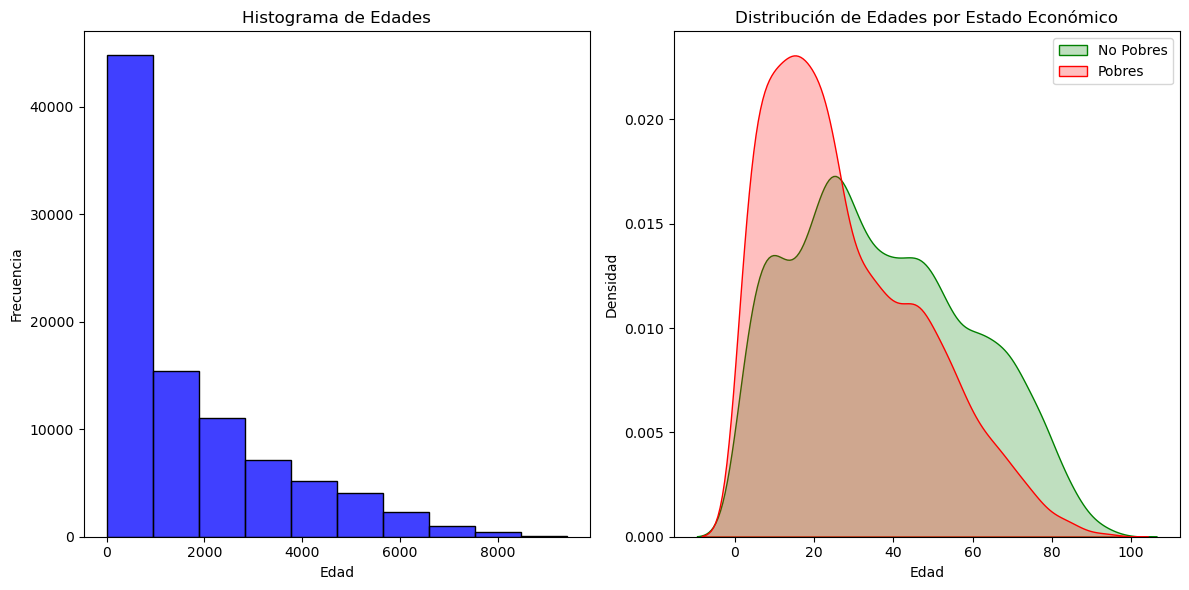

In [59]:
#CRE0 EDAD_2
union_eph['EDAD_2'] =  union_eph["CH06"].fillna(0) ** 2

# Configurar el gráfico
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# PANEL A: HISTOGRAMA de EDAD_2
sns.histplot(union_eph['EDAD_2'], bins=10, kde=False, ax=axs[0], color='blue')
axs[0].set_title('Histograma de Edades')
axs[0].set_xlabel('Edad')
axs[0].set_ylabel('Frecuencia')

# PANEL B: Distribución de kernels para POBRES y NO POBRES
sns.kdeplot(data=union_eph[union_eph['pobre'] == 0], x='CH06', fill=True, label='No Pobres', ax=axs[1], color='green')
sns.kdeplot(data=union_eph[union_eph['pobre'] == 1], x='CH06', fill=True, label='Pobres', ax=axs[1], color='red')

axs[1].set_title('Distribución de Edades por Estado Económico')
axs[1].set_xlabel('Edad')
axs[1].set_ylabel('Densidad')
axs[1].legend()

# Mostrar gráficos
plt.tight_layout()
plt.show()


In [58]:

# Comentario sobre la distribución
html_texto = """
<p> 
La distribución de edades en el histograma muestra que la mayoría de las personas se encuentran en el rango de edad media, con una caída en las frecuencias hacia los extremos. 
En el panel de distribución de kernels, se observa que los pobres tienden a concentrarse en un rango de edad más joven en comparación con los no pobres, quienes tienen una distribución más amplia. 
Esto podría indicar que hay menos oportunidades económicas para los jóvenes, lo que podría limitar su desarrollo personal y profesional.
</p> 
"""

display(HTML(html_texto))

In [28]:

# Ahora

union_eph["horastrab"] = union_eph["PP3E_TOT"].fillna(0) + union_eph["PP3F_TOT"].fillna(0)



In [ ]:
union_eph

In [29]:
#PRESCOLAR
union_eph.loc[(union_eph.CH12 == 1 ) & (union_eph.CH13 == 0), 'EDUC']=0
union_eph.loc[(union_eph.CH12 == 1 ) & (union_eph.CH13 == 1), 'EDUC']=0

#PRIMARIA
union_eph.loc[(union_eph.CH12 == 2) & (union_eph.CH13  == 0), 'EDUC'] = union_eph['CH14']
union_eph.loc[(union_eph.CH12 == 2) & (union_eph.CH13  == 1), 'EDUC']= 6

#EGB
union_eph.loc[(union_eph.CH12 == 3) & (union_eph.CH13  == 0), 'EDUC'] = union_eph['CH14']
union_eph.loc[(union_eph.CH12 == 3) & (union_eph.CH13  == 1), 'EDUC']=9

#SECUNDARIO
union_eph.loc[(union_eph.CH12 == 4) & (union_eph.CH13  == 0), 'EDUC'] = union_eph['CH14'] + 6
union_eph.loc[(union_eph.CH12 == 4) & (union_eph.CH13  == 1 ), 'EDUC']=12

#POLIMODAL
union_eph.loc[(union_eph.CH12 == 5) & (union_eph.CH13  == 0), 'EDUC'] = union_eph['CH14'] + 9
union_eph.loc[(union_eph.CH12 == 5) & (union_eph.CH13 == 1), 'EDUC']=12

#TERCIARIO
union_eph.loc[(union_eph.CH12 == 6) & (union_eph.CH13  == 0), 'EDUC'] = union_eph['CH14'] + 12
union_eph.loc[(union_eph.CH12 == 6) & (union_eph.CH13 == 1), 'EDUC']=14

#UNIVERSITARIO
union_eph.loc[(union_eph.CH12 == 7) & (union_eph.CH13  == 0), 'EDUC'] = union_eph['CH14'] + 12 
union_eph.loc[(union_eph.CH12 == 7) & (union_eph.CH13 == 1), 'EDUC']=17

#POSTGRADO
union_eph.loc[(union_eph.CH12 == 8) & (union_eph.CH13  == 0), 'EDUC'] = union_eph['CH14'] + 17
union_eph.loc[(union_eph.CH12 == 8) & (union_eph.CH13 == 1), 'EDUC']=20

#ESPECIAL
union_eph.loc[(union_eph.CH12 == 9) & (union_eph.CH13  == 0), 'EDUC'] = union_eph['CH14'] 
union_eph.loc[(union_eph.CH12 == 9) & (union_eph.CH13 == 1), 'EDUC']=6


In [31]:
#NO VA - Solo para revisar las transformaciones en excel

##############################################################

#destino
carpeta2 = r'C:\Users\rodol\Desktop\BDyML\Repositorio\BigDataUBA-Grupo3\TP3-Grupo3\outputs'

#2005
# Asi se llamara el excel
archivo_nombre = "union_eph.xlsx"

destino = os.path.join(carpeta2, archivo_nombre)

# Guardo el archivo
union_eph.to_excel(destino, index=False)
##############################################################
#2025

#archivo_nombre = "sel_t0125.xlsx"

#destino = os.path.join(carpeta2, archivo_nombre)

#sel_t0125.to_excel(destino, index=False)
